# **Data Exploration: Hospital Readmissions**

### Welcome to the section on decision trees, random forests, and XGBoost! In the following notebooks you will be implementing these three algorithms, and in addition to all having very fun names they will be some of your most versatile tools in machine learning for both classification and regression. We will get into the details of the algorithms later on, but first we just want to discuss the dataset and the high level goal of the folowing projects.

### We will be focusing on implementing these algorithms for a classification task. Make sure you remember the high level difference between classification and regression
### - `Classification`- whether or not something belongs to a certain class (car, truck, plane)

### - `Regression`- prediction of a continuous variable (heart rate given certain parameters, post operative systolic blood pressure)

### Here, we will be doing `binary classification`, where we will be attempting to predict whether or not a patients gets readmitted based on their information from the chart. 

### The data source is publicly available (https://www.kaggle.com/datasets/dubradave/hospital-readmissions) and contains information such as age, time in hospital, primary diagnosis, and more. It may be helpful to take a quick look at the data before starting this projeect as certain things may make more sense, but just remember our `big goal is to make predictions about whether or not the patient will be readmitted based on the data in their chart`.

### As always, there are many ways to approach these types of problems, and the following notebooks may not be the ideal approach and there are many other ways that are out of the scope of Code Grand Rounds to improve the performance of these models. We are aiming to give you an introduction to these algorithms, discuss how they work and some tricks you can use based around them, and hopefully provide a framework for you to apply these concepts to your own data. 

### Without further ado, lets dive in!

In [2]:
# Install and import all the neccessary stuff

%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Note: you may need to restart the kernel to use updated packages.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## **Import Data and Initial Looks**
### As we are now in the machine learning module, we want to spend a majority of the time on the actual models themself. However, as you should know by now most of the time spent doing data science is just 'getting to know' your data as well as cleaning it. 
### As this is open source data it comes pre packaged to us relatively clean, but we will still go through the pipeline of inspecting it, doing some initial visualizations, as well as any neccesary cleaning before moving on to the model building part. 

### It is important to never skip these steps, and practice makes habit, so if some of this is repetive to what you have seen already in Code Grand Rounds, that is OK!

### Let's start by importing the data and visualizing it using the `head` method from pandas

In [3]:

# Import the dataset
df = pd.read_csv('hospital_readmissions.csv')

# Display the first few rows of the dataset
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


### Looks like everything imported appropriately. 
### Now lets get some basic summary statistics

In [4]:
# Get basic summary statistics for numerical columns
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


### We will leave a detailed interpretation of this up to you, but one quick takeaway here is that there is a lot of data (25,000 rows). This is good! Make sure you understand what all these metrics mean and how to interpret them. If you need a refresher go back to Module 2!

### Now lets get some info about data types and probe the number of missing (null) values using the `info()` method from pandas

In [5]:
# Get info about data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

### From this we can see that there are no null values in the dataset! This is great for our purposes here, but remember this will very rarely be the case in the real world, and if it wasn't the case you would have to be ready to handle these in your dataset (again, see module 2 for a refresher)

### We will just show one more way to check for the presence of null values now so you can see the syntax

In [6]:
# This is redundant because we can see there are no null counts from above, but this is another nice way to look for null data
print('total count of null values: \n', df.isnull().sum())

total count of null values: 
 age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64


### Great. So taking this all together we have no null values (again, great, but not always totally realistic), and a mix of categorical (object) and numerical data. As machine learning (generally) works with numbers and not letters (categorical data), we will need to do some cleaning on this later. 

### Before we do this, however, let's start by visualizing the numeric data.

## Visualization of Numerical Data

### We will start by making some histograms of the data to see the distributions of the numerical data. The following code allows us to plot all of the histograms on the same chart which aids us in interpreting it.

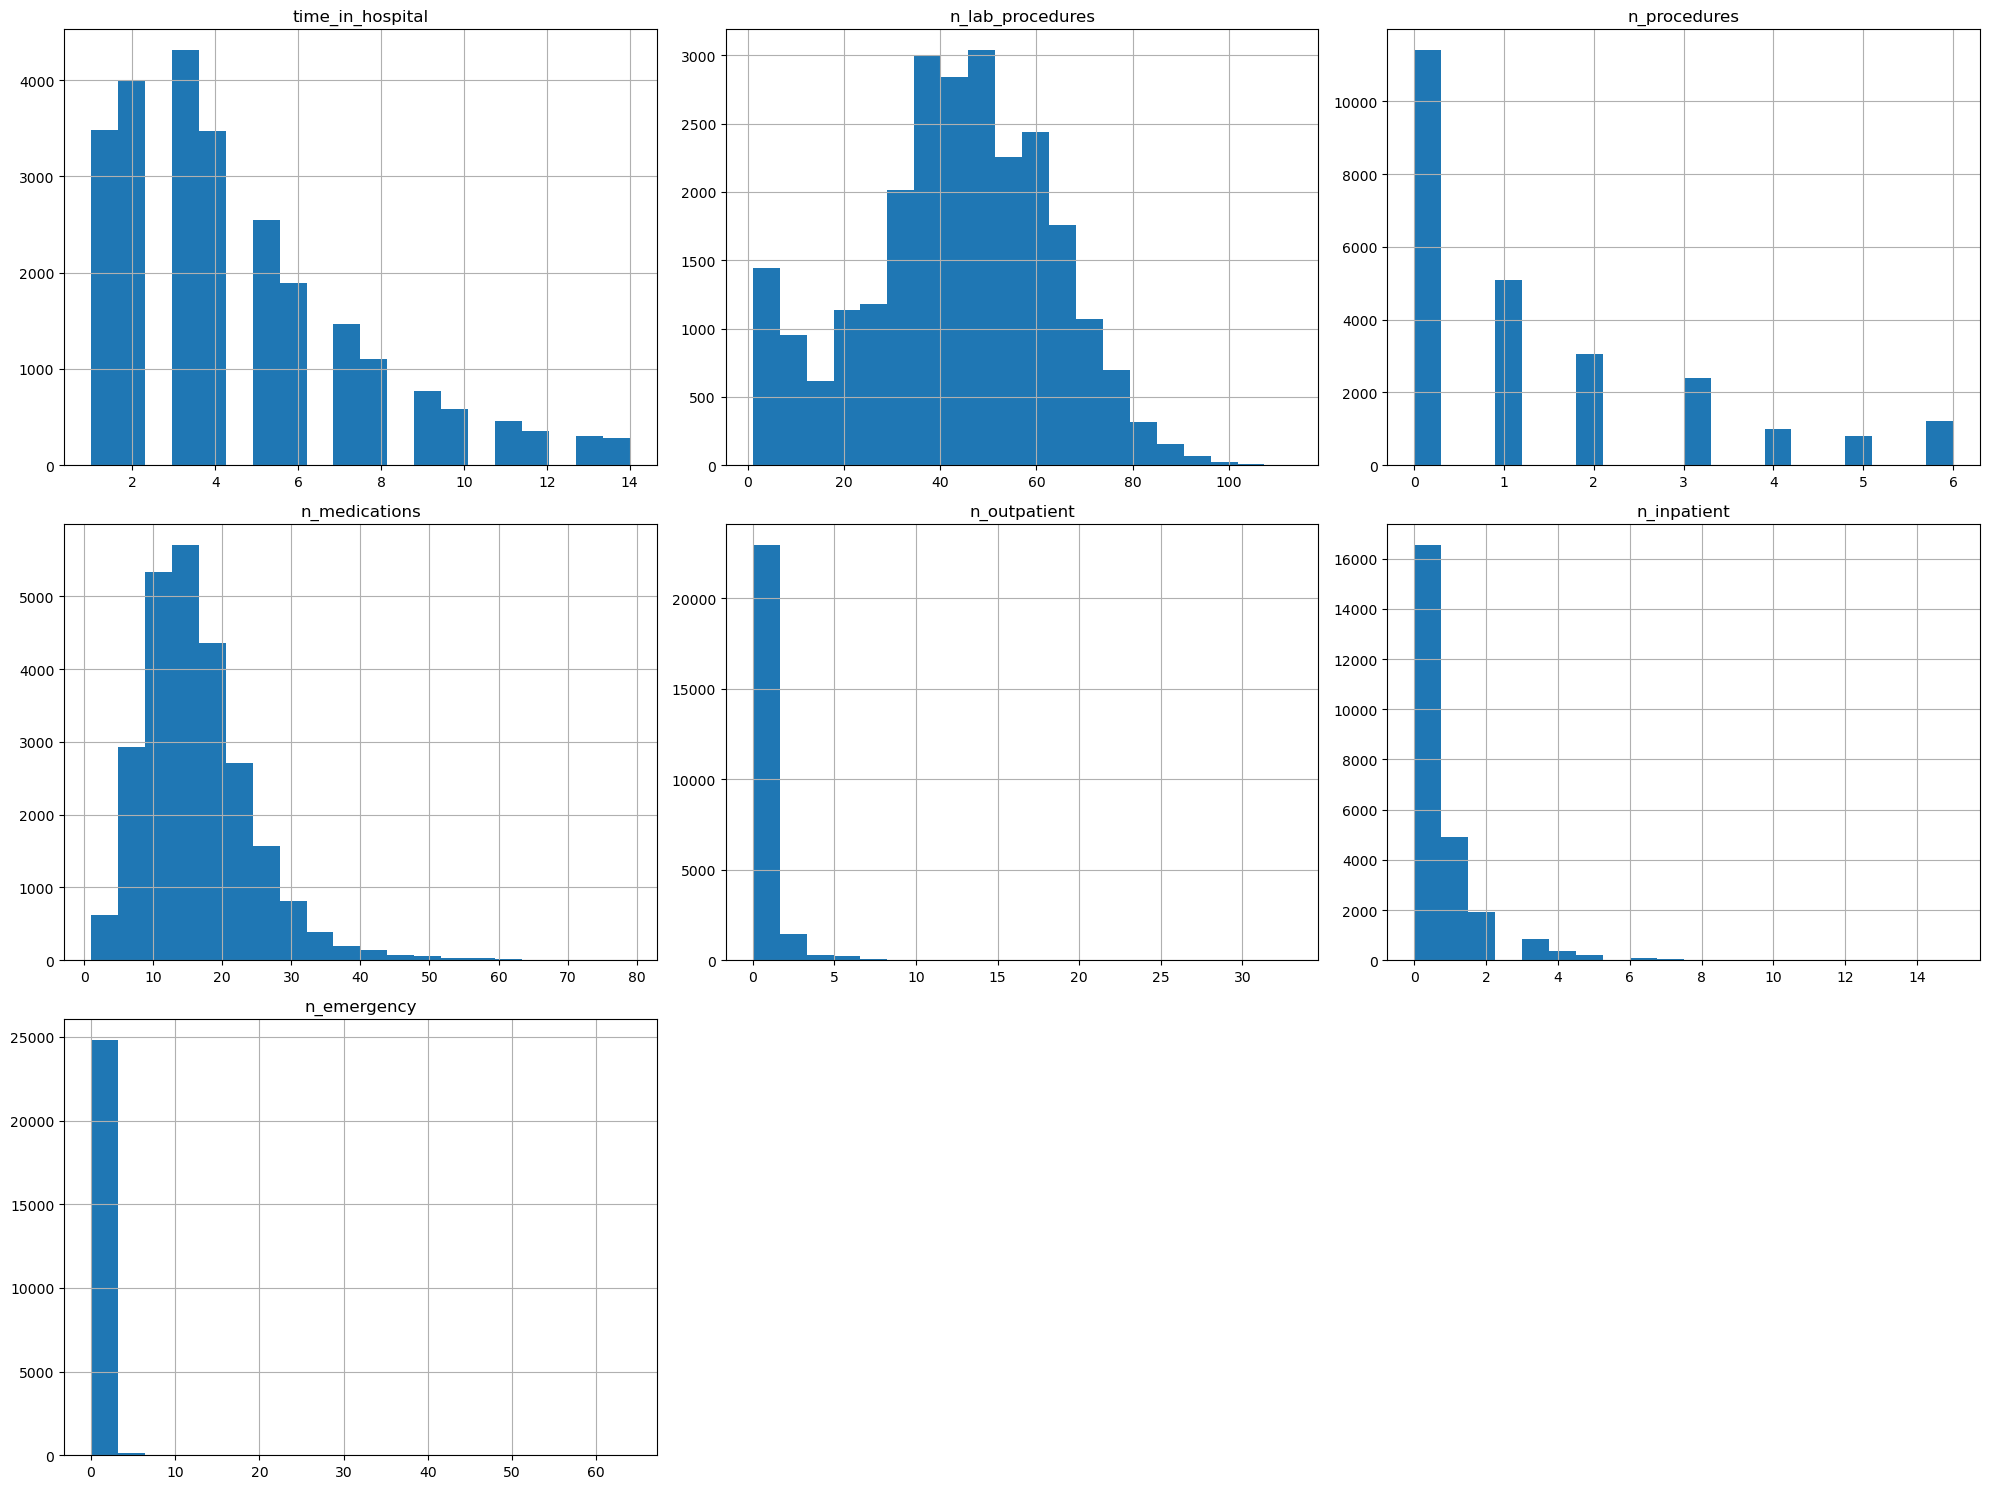

In [7]:
# select_dtypes' method to filter columns in the DataFrame 'df' with data types 'float64' or 'int64'.
# This returns a DataFrame with only those columns having the mentioned data types, and then we chain it to the 'hist' method to plot histograms.
# 'bins' specifies the number of bins to use for the histograms.
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(20,15), bins=20)

# Adjust the layout of the plots to ensure that there are no overlaps and everything fits well.
plt.tight_layout()

# Display the plotted histograms.
plt.show()

### Great! Again we will leave a detailed analysis of this to you, but we can immediately see that most people did not have many emergency room, outpatient, or inpatient visits in the previous year, and no one had more than 14 days in the hospital (which you could also find in the documentation for the dataset). These aren't neccesarily important, but sometimes observations like these should just be said outloud so you can begin to understand the data you are working with. You can (and should on your own) try to visualize this data in other ways (for example, using a box plot...), but we will stop here for brevity.

### Lets now start to work with our categorical data

##  Visualization of Categorical Data

### Now we want to take a look at our categorical dat. Lets start by just looking at the frequency of all the choices for every categorical feature. We will do this using the seaborn `countplot` method, and iterate through all the categorical `object` features in a for loop. 

In [1]:
# # Using the 'select_dtypes' method on the DataFrame 'df' to filter columns that have data type 'object' 
# # After selecting these columns, obtain their column names and convert them into a list.
# categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# # Looping over each categorical feature in the list.
# for feature in categorical_features:
#     # Creating a new figure for each categorical feature with specified width and height in inches.
#     plt.figure(figsize=(6, 3))
    
#     # First, we'll use the value_counts() method on the column to get the counts of each category.
#     counts = df[feature].value_counts()
    
#     # Plotting those counts. The index of the 'counts' series will give the categories, 
#     # and the values will give the counts.
#     plt.bar(counts.index, counts.values)
    
#     # Adding a title to the plot, indicating which feature's count plot it is.
#     plt.title(f"Count Plot of {feature}")
    
#     # Rotating the x-axis labels by 45 degrees to ensure they don't overlap and are readable.
#     plt.xticks(rotation=45)
    
#     # Adjusting the layout of the plot to make sure everything fits well and there are no overlaps.
#     plt.tight_layout()
    
#     # Displaying the plotted count plot.
#     plt.show()
    
# Using the 'select_dtypes' method on the DataFrame 'df' to filter columns that have data type 'object' 
# After selecting these columns, obtain their column names and convert them into a list.
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# count the number of features that are categorical
n_features = len(categorical_features)
# Determine the number of columns we want to have for our final figure
n_cols = 2
# Set the number of rows to include in the number of final figures
n_rows = 5
# set up the subplot so we can put all the plots in one nice figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))

# iterate through the categorical features, get the count of the individual data (as it is categorical)
# and add it to the subplot
# enumerate is a built in tool in Python to increase the value of i for every iteration
# on the first iteration, i is 0, on the second, i is on (computers are 0 indexed!), and so on so forth
for i, feature in enumerate(categorical_features):
    ax = axes.flatten()[i]
    counts = df[feature].value_counts()
    ax.bar(counts.index, counts.values)
    ax.set_title(f"Count Plot of {feature}")
    ax.tick_params(axis="x", rotation=45)
    
plt.tight_layout()
plt


NameError: name 'df' is not defined

### Ok a lot to unpack here. Lets go systmatically through as most of the required data cleaning steps required involved these features (as they are categorical, and we need them to be numerical)

### - Age has a couple of brackets from 40-50 up to 90-100. Not much to say about this other than cool
### - diag_1 (or primary diagnosis) has no missing type, which is good, and most people have a 'circulatory' primary diagnosis. Secondary (diag_2) and tertiary (diag_3) still have a lot of circulatory (particularly diag_2), but increasing counts of 'missing' and 'other', which could be important
### - For glucose test and A1C test, most of the participants have a 'no', which means it wasn't performed. As so many people do not have this test, it may impact our wilingness to include it in the model downstream based on domain knowledge. Definitely worth noting this.
### - Change (change in diabeted medicine) is roughly 50/50 split for our participants, and most people are taking diabetes medicine based on 'diabetes_med'
### - Finally, there is about a 50/50 split of people who were readmitted, with slightly more people being not. This is really good to know, as this what we will ultimately be predicting, and if there was a class imbalance here it could definitely impact our downstream steps (SMOTE, weight adjustion (logistic regression notebook- module 2), etc. Make sure to read up on these if you see this in your data).

### Now it is time to do some cleaning on this data. Again, the choices shown here are not neccesarily the *best* way to do this. We have chosen these techniques based on our experience as well as what the data looks like, but feel free (and do) try other approaches. The preprocessing steps you take can directly impact the performance of your model, so make sure to spend a lot of time here and don't be afraid to revist later on.

### Let's start by doing one hot encoding on the the `medical specialty`, `diag_1`, `diag_2`, and `diag_3` features. We can do this via `get_dummies` from pandas, and if you need a refresher on what is happening here visit module 2 logistic regression. In brief, one hot encodings converts each unique category value into a new column and then uses a binary value to indicate the presence of that category. Be sure to inspect the output of `df_encoded.head()` to take a look at the new dataframe

In [9]:
# Do one hot encoding on medical specialty and the 3 diagnosis columns 
df_encoded = pd.get_dummies(df, columns=['medical_specialty'])
df_encoded = pd.get_dummies(df_encoded, columns=['diag_1'])
df_encoded = pd.get_dummies(df_encoded, columns=['diag_2'])
df_encoded = pd.get_dummies(df_encoded, columns=['diag_3'])

df_encoded.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,glucose_test,A1Ctest,...,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory
0,[70-80),8,72,1,18,2,0,0,no,no,...,False,True,False,False,False,False,False,False,True,False
1,[70-80),3,34,2,13,0,0,0,no,no,...,True,False,False,False,False,False,False,False,True,False
2,[50-60),5,45,0,18,0,0,0,no,no,...,False,False,True,False,False,False,False,False,False,False
3,[70-80),2,36,0,12,1,0,0,no,no,...,True,False,False,True,False,False,False,False,False,False
4,[60-70),1,42,0,7,0,0,0,no,no,...,False,False,False,False,False,False,False,False,False,True


### Convert the true/false one hot encodings back to numbers so we can send it through the machine learning pipeline later. 

In [10]:
# Convert boolean columns (if any) to integers (1 and 0)
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)
        
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 44 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   age                                       25000 non-null  object
 1   time_in_hospital                          25000 non-null  int64 
 2   n_lab_procedures                          25000 non-null  int64 
 3   n_procedures                              25000 non-null  int64 
 4   n_medications                             25000 non-null  int64 
 5   n_outpatient                              25000 non-null  int64 
 6   n_inpatient                               25000 non-null  int64 
 7   n_emergency                               25000 non-null  int64 
 8   glucose_test                              25000 non-null  object
 9   A1Ctest                                   25000 non-null  object
 10  change                                    2500

### Note how we have generated many new columns that represent the one hot encodings of our data. We only had a few categories for each feature we encoded so this was an ok approach here, but be cautious of doing this when you have many categories as this can dramatically expand the size of your data and also increase the amount of memory it takes to store. 
### In the output of `df_encoded.info()`, we see that there is a `memory usage` output at the bottom. On an M1 macbook air, this reads 8.4MB. As most modern computers have gigabytes of RAM (the place where data like this is physically stored on your machine), this is probably OK as it is only a small fraction of all of our RAM. We mention this as a reminder to keep the limitations of your hardware in mind when doing machine learning experiments, as it can very quickly get out of hand

### Now lets handle the remaining categorical columns. We have: 
1. ### Age (age bracket of the patient)
2. ### Glucose test (whether the glucose serum came out as high (> 200), normal, or not performed)
3. ### A1C Test (whether the A1C level of the patient came out as high (> 7%), normal, or not performed)
4. ### Change (whether there was a change in the diabetes medication ('yes' or 'no'))
5. ### Diabetes med (whether a diabetes medication was prescribed ('yes' or 'no'))
6. ### Readmitted (if the patient was readmitted at the hospital ('yes' or 'no'))

### Lets start with age. As these are bracketed age groups, and the magnitude of the age range is significant and we only want a single value for age, lets just map the age brackets to the mean age for each bracket (e.g.: [50-60] --> 55)

In [11]:
# Make a dictionary of the age brackets where the key is the bracket and the value is the mean age
age_mapping = {
    '[40-50)': 45, 
    '[50-60)': 55, 
    '[60-70)': 65, 
    '[70-80)': 75, 
    '[80-90)': 85, 
    '[90-100)': 95
}

# Perform the actual mapping using the mapping method from pandas
df_encoded['age'] = df_encoded['age'].map(age_mapping)

### For glucose test and A1C, we have categories of high, normal, or not performed. Lets map these to 2, 1, or 0 respectively. You could also one hot encode these features, but to try and minimize the size of data stored in memory (although not likely to be a problem here) we will stick with mapping (aka, ordinal encoding) 

### While we won't spend so much time on this, keep in mind that ordinal encoding (mapping) is assigning values which can influence how the algorithm interprets them. Here, we are saying that no lab test administration probably carries less weight than a normal reading (but it was still administered) which carries less weight than a high reading. This is definitely a massive assumption of our data, and could introduce a level of bias. One hot encoding this data is another choice you could make, or you could map no and normal both to 0 if you thought that is a more fair approach. This requires experimentation, but this is another place you could look to improve the model's performance. When we build the model on the notebook we will apply all of these preprocessing steps to the data in the first cell, so feel free to change them on your own to see what happens.

In [12]:
# Make a dictionary of the categories where the key is the bracket and the value is the mean age
lab_mapping = {
    'no': 0, 
    'normal': 1, 
    'high': 2
}

# Perform the actual mapping using the mapping method from pandas
df_encoded['glucose_test'] = df_encoded['glucose_test'].map(lab_mapping)
df_encoded['A1Ctest'] = df_encoded['A1Ctest'].map(lab_mapping)

df_encoded.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,glucose_test,A1Ctest,...,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory
0,75,8,72,1,18,2,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,75,3,34,2,13,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,55,5,45,0,18,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,75,2,36,0,12,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,65,1,42,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### The final three features (change, diabetes med, and readmitted status (our ultimate predictor)) are all binary (yes/no). We can do a simple mapping using 1 or 0 to handle these guys. This is a very standard way to handle yes/ no data.

In [13]:
# Make a dictionary of the categories where the key is the bracket and the value is the mean age
binary_mapping = {
    'no': 0, 
    'yes': 1
    }

# Perform the actual mapping using the mapping method from pandas
df_encoded['change'] = df_encoded['change'].map(binary_mapping)
df_encoded['diabetes_med'] = df_encoded['diabetes_med'].map(binary_mapping)
df_encoded['readmitted'] = df_encoded['readmitted'].map(binary_mapping)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 44 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   age                                       25000 non-null  int64
 1   time_in_hospital                          25000 non-null  int64
 2   n_lab_procedures                          25000 non-null  int64
 3   n_procedures                              25000 non-null  int64
 4   n_medications                             25000 non-null  int64
 5   n_outpatient                              25000 non-null  int64
 6   n_inpatient                               25000 non-null  int64
 7   n_emergency                               25000 non-null  int64
 8   glucose_test                              25000 non-null  int64
 9   A1Ctest                                   25000 non-null  int64
 10  change                                    25000 non-null  

### Ok phew. We now have gotten all of our data out of categorical and into numerical format, and done, for now, a sufficient amount of cleaning on this data. Lets move on to the exciting part and build and evaluate our models!